In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import minst.model
import minst.taxonomy

%matplotlib inline
seaborn.set()

In [2]:
dframe = pd.read_csv("/Users/ejhumphrey/data/minst/master_index.csv", index_col=0)
dframe = minst.taxonomy.normalize_instrument_names(dframe)
dframe.sample(5)

,audio_file,dataset,duration,dynamic,instrument,note_number,partition,source_index,start_time
092CGAFMd06f21,092CGAFM_13.flac,rwc,4.816327,M,guitar,NaN,NaN,rwcf6a6e74f,71.137642
181CBPCFd2017b,181CBPCF_16.flac,rwc,5.469388,F,double-bass,NaN,NaN,rwc83f26c00,80.443311
173VCNVM93f0dc,173VCNVM_45.flac,rwc,3.950113,M,cello,NaN,NaN,rwc0a193b22,190.457143
221TBC1P57114c,221TBC1P_19.flac,rwc,3.519274,P,trombone,NaN,NaN,rwc81799527,67.568254
211TRW3P0a1368,211TRW3P_0.flac,rwc,3.600907,P,trumpet,NaN,NaN,rwcae809d4c,0.048980


In [9]:
uiowa = dframe[dframe.dataset == 'uiowa']
rwc = dframe[dframe.dataset == 'rwc']
philz = dframe[dframe.dataset == 'philharmonia']

('philharmonia', 7923)
('rwc', 27557)
('uiowa', 3417)


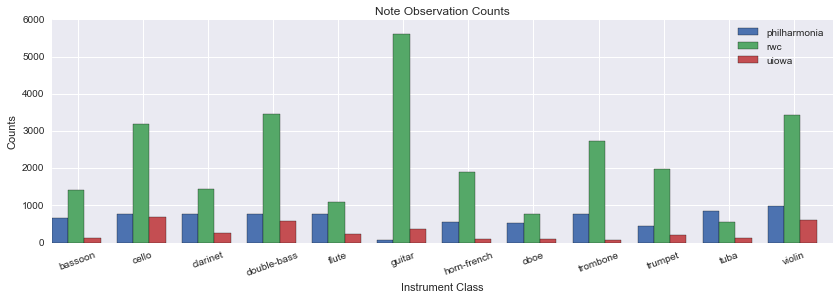

In [12]:
fig, ax = plt.subplots(figsize=(14, 4))
instruments = sorted(dframe.instrument.unique())

x_axis = np.arange(len(instruments))
datasets = sorted(dframe.dataset.unique())
width = 1. / (len(datasets) + 1)
colors = seaborn.color_palette()
for n, (dset, c) in enumerate(zip(datasets, colors)):
    dset_df = dframe[dframe.dataset == dset]
    print(dset, len(dset_df))
    counts = dset_df.groupby(["instrument"])
    ax.bar(x_axis + n * width, counts.instrument.count().values, 
           width=width, label=dset, fc=c)

ax.set_xticks(x_axis + 0.4)
ax.set_xticklabels(instruments, rotation=20);
ax.set_xlabel("Instrument Class")
ax.set_ylabel("Counts")
ax.set_title("Note Observation Counts")
plt.legend(loc='best')